# Observed Number of Very Cold Days (tmax < 0F)

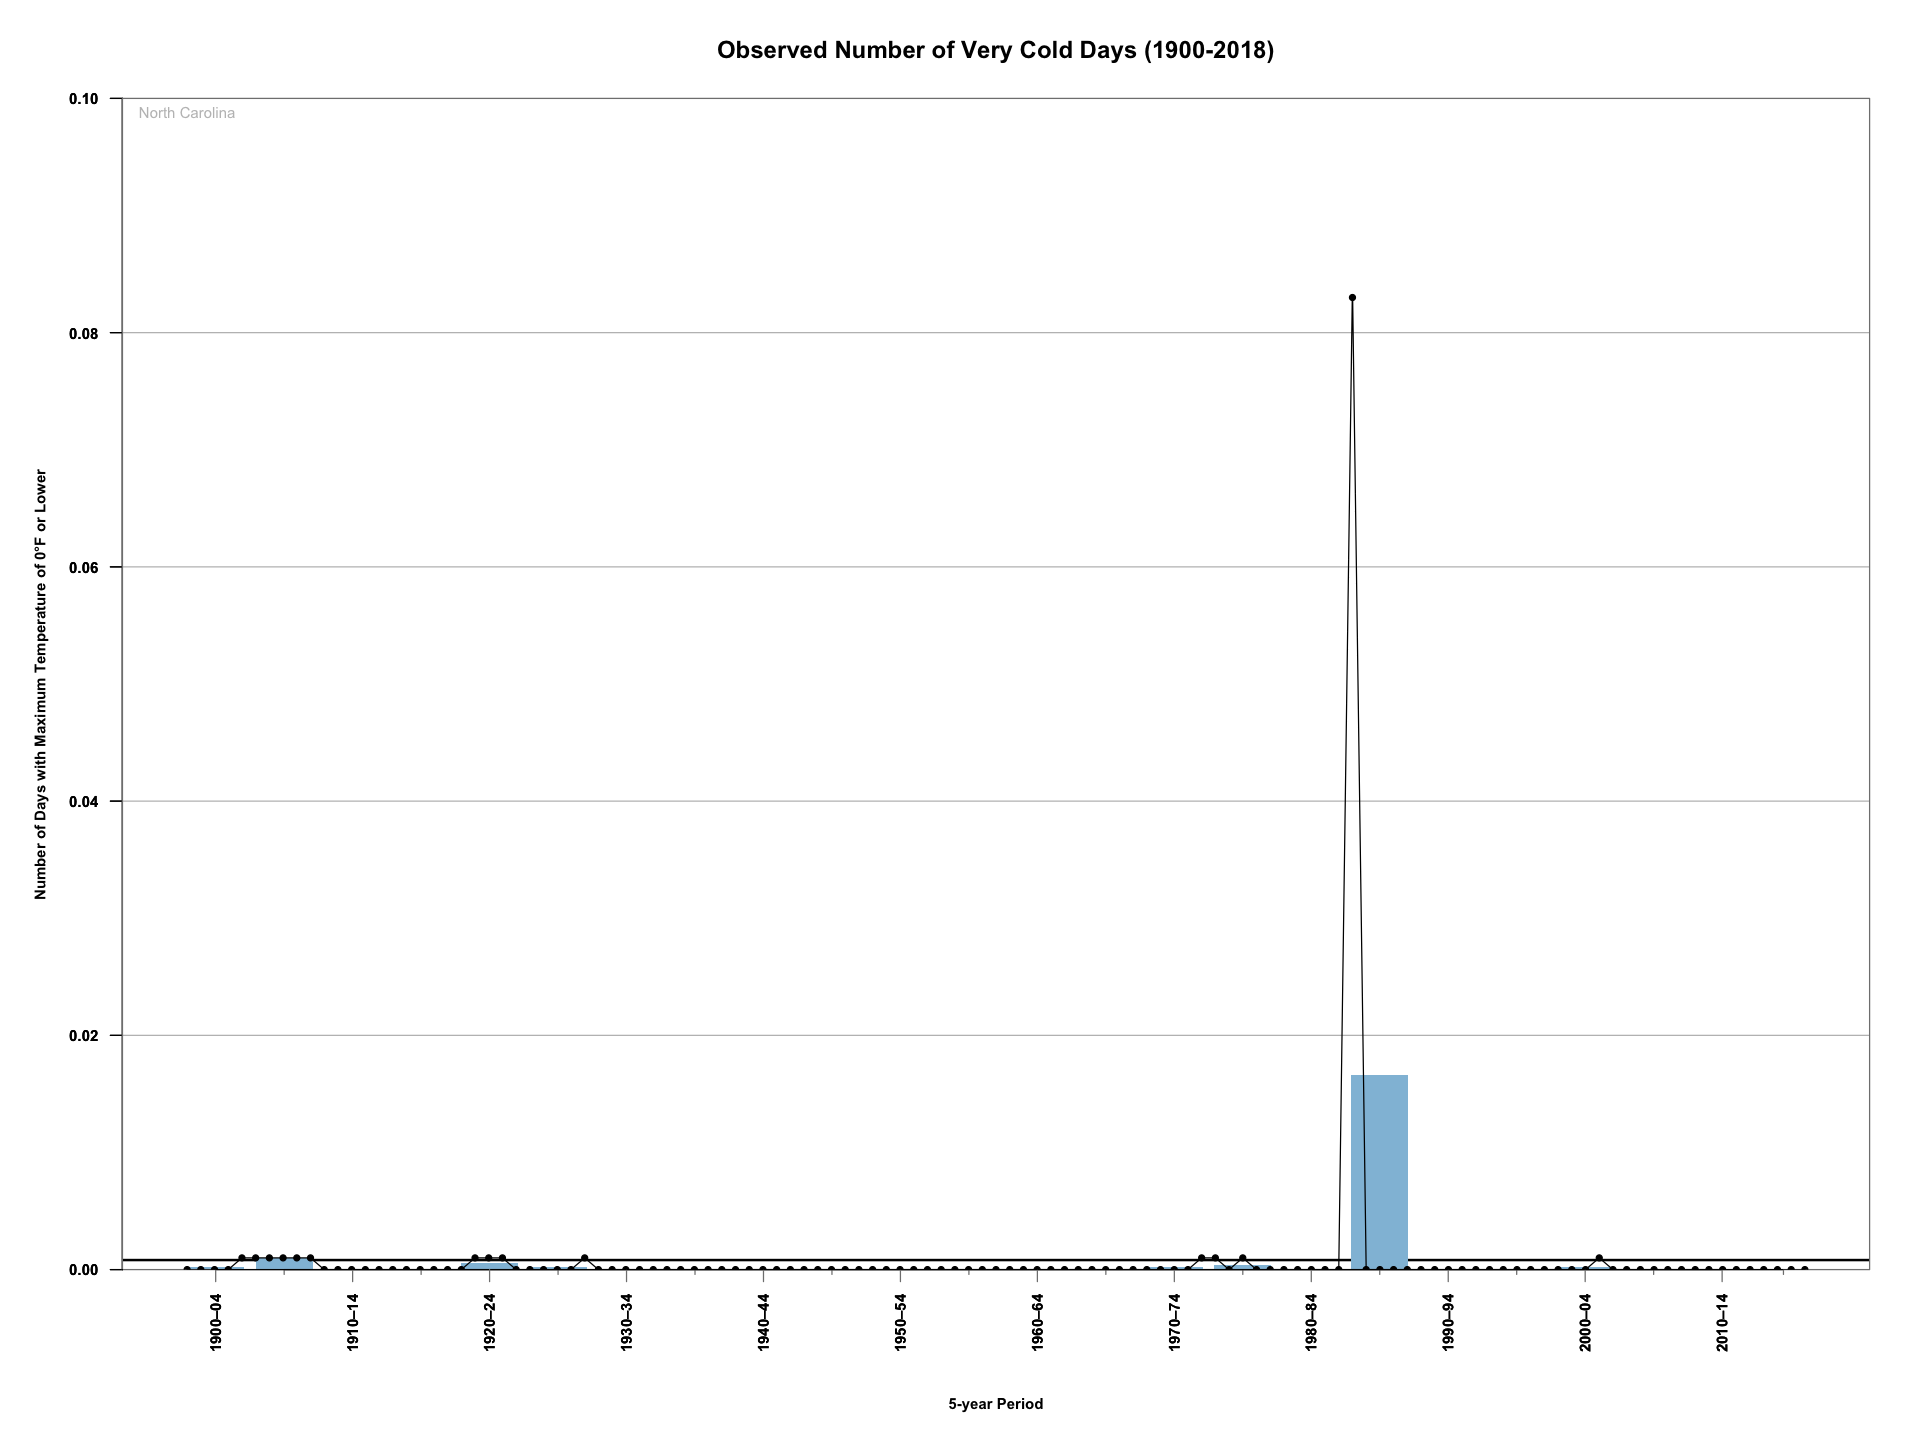

In [1]:
#
#	OBSERVED NUMBER OF VERY COLD DAYS (tmax<0F)
#
library(graphics)
library(IRdisplay)
options(warn=-1)
options(repr.plot.width = 16, repr.plot.height = 12)

#
# import file minus diagnostics
#
temp <- read.table("https://ncics.org/tsu-data/state-summaries/2018/nc/statetmax0F_1900_2018_Jan30_2019.txt", header=FALSE, fill=TRUE, na.strings=c("-999"))
temp[temp == -999]  <- NA

#
# add column headers
#
colnames(temp) <- c("Year", "AL_Value", "AL_Gct", "AZ_Value", "AZ_Gct", "AR_Value", "AR_Gct", "CA_Value", "CA_Gct", "CO_Value", "CO_Gct", "CT_Value", "CT_Gct", "DE_Value", "DE_Gct", "FL_Value", "FL_Gct", "GA_Value", "GA_Gct", "ID_Value", "ID_Gct", "IL_Value", "IL_Gct", "IN_Value", "IN_Gct", "IA_Value", "IA_Gct", "KS_Value", "KS_Gct", "KY_Value", "KY_Gct", "LA_Value", "LA_Gct", "ME_Value", "ME_Gct", "MD_Value", "MD_Gct", "MA_Value", "MA_Gct", "MI_Value", "MI_Gct", "MN_Value", "MN_Gct", "MS_Value", "MS_Gct", "MO_Value", "MO_Gct", "MT_Value", "MT_Gct", "NE_Value", "NE_Gct", "NV_Value", "NV_Gct", "NH_Value", "NH_Gct", "NJ_Value", "NJ_Gct", "NM_Value", "NM_Gct", "NY_Value", "NY_Gct", "NC_Value", "NC_Gct", "ND_Value", "ND_Gct", "OH_Value", "OH_Gct", "OK_Value", "OK_Gct", "OR_Value", "OR_Gct", "PA_Value", "PA_Gct", "RI_Value", "RI_Gct", "SC_Value", "SC_Gct", "SD_Value", "SD_Gct", "TN_Value", "TN_Gct", "TX_Value", "TX_Gct", "UT_Value", "UT_Gct", "VT_Value", "VT_Gct", "VA_Value", "VA_Gct", "WA_Value", "WA_Gct", "WV_Value", "WV_Gct", "WI_Value", "WI_Gct", "WY_Value", "WY_Gct") 

#
# NC analysis
#
# creating the NC subset
#
NCsub <- subset(temp,select=c(Year, NC_Value))

#
# calculate average for all NC
#
NCtempavefull <- mean(NCsub$NC_Value)

#
# create the five year means for each five year period
#
f1 <- function(NCsub, n, type=1) {
    if (type == 1) {
	L1 <- nrow(NCsub) %/% n
	NCsub$grp <- c(rep(seq(L1), each=n), rep(tail(seq(L1), 1), nrow(NCsub)-n*L1))
	return(aggregate(NC_Value~grp, NCsub, mean))
    }
    else if (type == 2) {
	L1 <- nrow(NCsub) %/% n
	NCsub$grp <- c(rep(seq(L1), each=n), rep(tail(L1, 1)+1, nrow(NCsub)-n*L1))
	return(aggregate(NC_Value~grp, NCsub, mean))
    }
}

#
# OPTION 2: use the function below if you want the extra years as a separate column 
#
NCgrpave <- f1(NCsub, 5, type=2)
NCfiveyrave <- NCgrpave$NC_Value

#
# linear regression of time series data for all years
#
NCfit.temp <- lm(NC_Value ~Year, data=temp)


#
#	VERY COLD DAYS GRAPHIC
#
#png("img/NCverycolddays2018.png", width=8,height=6,units="in",res=600)

#
# adjust the dates below to label the columns with the years; if no label is needed for a column use two quotation marks with no space between ("")
#
dates <- c("1900–04", "", "1910–14", "", "1920–24", "", "1930–34", "", "1940–44", "", "1950–54", "", "1960–64", "", "1970–74", "", "1980–84", "", "1990–94", "", "2000–04", "", "2010–14", "")
df <- data.frame(dates, NCfiveyrave)
par(mar = c(7,5,4,2) + 0.1)

#
# adjust the width below to match the requested length for each of the columns (0.4=3 years; 0.6=4 years; 0.8=5 years; 1.0=6 years; 1.2=7 years); when going from one column to two, be sure that both widths are included in the code
#
NCverycolddaysgraph <- barplot (df$NCfiveyrave, df$NCfiveyrave[1:23], width=c(0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6), space=c(0.2), legend=FALSE, main="Observed Number of Very Cold Days (1900-2018)", names.arg=df$dates, col=("#91BFDB"), las=2, font=2, font.lab=2, ylim=range(pretty(NCsub$NC_Value)), xpd=FALSE, border=NA, cex.lab=9/12, cex.axis=9/12, cex.names=9/12)
mtext(side=3, text="North Carolina", line=-1, cex=9/12, adj=0.01, col="#BFBFBF")
mtext(side=1, text="5-year Period", line=5, font=2, cex=9/12)
mtext(side=2, text="Number of Days with Maximum Temperature of 0°F or Lower", line=3, font=2, cex=9/12)
abline(h=NCtempavefull, lwd=2)
grid(ny=NULL, nx=FALSE, col="#BFBFBF", lty=1)

#
# adjust the width below to match the requested length for each of the columns (0.4=3 years; 0.6=4 years; 0.8=5 years; 1.0=6 years; 1.2=7 years); when going from one column to two, be sure that both widths are included in the code
#
barplot (df$NCfiveyrave, df$NCfiveyrave[1:23], width=c(0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6), space=c(0.2), legend=FALSE, main="Observed Number of Very Cold Days (1900-2018)", names.arg=df$dates, col=("#91BFDB"), las=2, font=2, font.lab=2, ylim=range(pretty(NCsub$NC_Value)), xpd=FALSE, border=NA, add=TRUE, cex.lab=9/12, cex.axis=9/12, cex.names=9/12)
box(col="#808080")
at <- c(NCverycolddaysgraph)
at1 <- at[c(TRUE, FALSE)]
at2 <- at[c(FALSE, TRUE)]
axis(side=1, at=at2, labels=FALSE, tcl=-0.2, col.ticks="#808080")
axis(side=1, at=at1, labels=FALSE, tcl=-0.5, col.ticks="#808080")
par(new=TRUE)

#
# the below code plots the individual year data on the graph; when an additional year is added, add another value (in increments of 0.2) to the sequence below. for example, when 2018 data is added, add 24.2; for 2019, 24.4 would be added
#
plotlocations <- c(0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 8.2, 8.4, 8.6, 8.8, 9, 9.2, 9.4, 9.6, 9.8, 10, 10.2, 10.4, 10.6, 10.8, 11, 11.2, 11.4, 11.6, 11.8, 12, 12.2, 12.4, 12.6, 12.8, 13, 13.2, 13.4, 13.6, 13.8, 14, 14.2, 14.4, 14.6, 14.8, 15, 15.2, 15.4, 15.6, 15.8, 16, 16.2, 16.4, 16.6, 16.8, 17, 17.2, 17.4, 17.6, 17.8, 18, 18.2, 18.4, 18.6, 18.8, 19, 19.2, 19.4, 19.6, 19.8, 20, 20.2, 20.4, 20.6, 20.8, 21, 21.2, 21.4, 21.6, 21.8, 22, 22.2, 22.4, 22.6, 22.8, 23, 23.2, 23.4, 23.6, 23.8, 24.0, 24.2)
plot(NCsub$Year, NCsub$NC_Value, type="o", col="black", pch=20, ylim=range(pretty(NCsub$NC_Value)), yaxs="i", axes=FALSE, ylab="", xlab="")
axis(side=1, at=plotlocations)
